In [1]:
from base64 import b64decode
from json import loads
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
# set matplotlib to display all plots inline with the notebook
%matplotlib inline

In [2]:
# Hyperparameters
# m is the number of lines in the next section
m = 60000
k = 100
t = 1600

60000
2


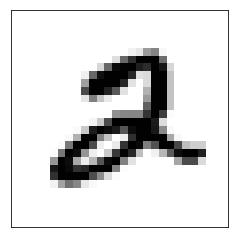

In [3]:
# Open the JSON file, passing all the lines to lines.
# Then use loads from json to get the json into digit dictionary
# Print the label of some item
# Display the image of some item
with open("digits.base64.json","r") as f:
    lines = f.readlines()
    print(len(lines))
    digit = loads(lines[5])
    a = loads(lines[1])
    b = loads(lines[21])
    
    print(digit['label'])
    image = np.fromstring(b64decode(digit["data"]),dtype=np.ubyte)
    image = image.astype(np.float64)
    
    first = np.fromstring(b64decode(a["data"]),dtype=np.ubyte)
    first = first.astype(np.float64)
    
    second = np.fromstring(b64decode(b["data"]),dtype=np.ubyte)
    second = second.astype(np.float64)
    plt.figure()
    fig = plt.imshow(image.reshape(28,28))
    fig.set_cmap('gray_r')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

In [4]:

dst = distance.euclidean(first, second)
print(dst)

1388.005763676794


In [9]:
def belowThreshold(dst) :
    """
    This function returns true if the value
    is less than the threshold
    """
    if(dst < t):
        return True
    else:
        return False

In [10]:
dst = distance.euclidean(first, second)
print(dst)
print(belowThreshold(dst))

1388.005763676794
True
